In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ibm_boto3
from botocore.client import Config
import pandas as pd

sns.set()

plt.rcParams['figure.figsize'] = [12, 16]

pd.set_option("display.max_columns", 100)

## Reading France Hospitalization Data and Regions/Departments Codes

In [3]:
cos_credentials  = ibm_boto3.client(service_name='s3',
    
                                ibm_api_key_id = 'fnL2pDJ7hOxPfQuNJ0MJDs9Qf4PVodwDaheJ8blAUDMN',
    
                                ibm_auth_endpoint = "https://iam.ng.bluemix.net/oidc/token",
    
                                config = Config(signature_version='oauth'),
                                    
                                endpoint_url = 'https://s3-api.us-geo.objectstorage.service.networklayer.com')

BUCKET_NAME = 'estimatetruecovidrates-donotdelete-pr-qhfbypwsbmv0pz'

demo_files = ['donnees-hospitalieres-classe-age-covid19-2020-06-09-19h00.csv', 'donnees-hospitalieres-covid19-2020-06-09-19h00.csv', 
             'donnees-hospitalieres-etablissements-covid19-2020-06-09-19h00.csv', 'donnees-hospitalieres-nouveaux-covid19-2020-06-09-19h00.csv', 
             'region2020.csv', 'departement2020.csv']

for filename in demo_files:
    
    print('Reading|', filename)
    
    cos_credentials.download_file(Bucket = BUCKET_NAME, Filename=filename, Key = filename)
    
hosp_classe_age = pd.read_csv(demo_files[0], sep = ";", encoding = "latin-1")

donnees_hosp = pd.read_csv(demo_files[1], sep = ";", encoding = "latin-1")

donnees_hosp_eta = pd.read_csv(demo_files[2], sep = ";", encoding = "latin-1")

donnees_hosp_nouveaux = pd.read_csv(demo_files[3], sep = ";", encoding = "latin-1")

donnees_regions = pd.read_csv(demo_files[4], sep = ",", encoding = "latin-1")

donnees_dep = pd.read_csv(demo_files[5], sep = ",", encoding = "latin-1")


Reading| donnees-hospitalieres-classe-age-covid19-2020-06-09-19h00.csv
Reading| donnees-hospitalieres-covid19-2020-06-09-19h00.csv
Reading| donnees-hospitalieres-etablissements-covid19-2020-06-09-19h00.csv
Reading| donnees-hospitalieres-nouveaux-covid19-2020-06-09-19h00.csv
Reading| region2020.csv
Reading| departement2020.csv


In [3]:
donnees_regions.head()

,reg,cheflieu,tncc,ncc,nccenr,libelle
0,1,97105,3,GUADELOUPE,Guadeloupe,Guadeloupe
1,2,97209,3,MARTINIQUE,Martinique,Martinique
2,3,97302,3,GUYANE,Guyane,Guyane
3,4,97411,0,LA REUNION,La RÃ©union,La RÃ©union
4,6,97608,0,MAYOTTE,Mayotte,Mayotte


## Reading Stringency Index

In [96]:
import requests

from pandas.io.json import json_normalize

In [83]:
response = requests.get("https://covidtrackerapi.bsg.ox.ac.uk/api/v2/stringency/date-range/2020-04-01/2020-06-11")

print(response.status_code)

200


In [99]:
data_df['data']

{'2020-04-01': {'ABW': {'date_value': '2020-04-01',
   'country_code': 'ABW',
   'confirmed': 55,
   'deaths': 0,
   'stringency_actual': 82.41,
   'stringency': 82.41,
   'stringency_legacy': 82.14,
   'stringency_legacy_disp': 82.14},
  'AFG': {'date_value': '2020-04-01',
   'country_code': 'AFG',
   'confirmed': 166,
   'deaths': 4,
   'stringency_actual': 67.59,
   'stringency': 67.59,
   'stringency_legacy': 80.95,
   'stringency_legacy_disp': 80.95},
  'AGO': {'date_value': '2020-04-01',
   'country_code': 'AGO',
   'confirmed': 7,
   'deaths': 2,
   'stringency_actual': 90.74,
   'stringency': 90.74,
   'stringency_legacy': 95.23,
   'stringency_legacy_disp': 95.23},
  'ALB': {'date_value': '2020-04-01',
   'country_code': 'ALB',
   'confirmed': 243,
   'deaths': 15,
   'stringency_actual': 84.26,
   'stringency': 84.26,
   'stringency_legacy': 91.66,
   'stringency_legacy_disp': 91.66},
  'AND': {'date_value': '2020-04-01',
   'country_code': 'AND',
   'confirmed': 376,
   'dea

In [97]:
# print(response.content)

data_df = response.json()

nycphil = json_normalize(data_df['data'])

nycphil.head(3)

,2020-04-01.ABW.confirmed,2020-04-01.ABW.country_code,2020-04-01.ABW.date_value,2020-04-01.ABW.deaths,2020-04-01.ABW.stringency,2020-04-01.ABW.stringency_actual,2020-04-01.ABW.stringency_legacy,2020-04-01.ABW.stringency_legacy_disp,2020-04-01.AFG.confirmed,2020-04-01.AFG.country_code,2020-04-01.AFG.date_value,2020-04-01.AFG.deaths,2020-04-01.AFG.stringency,2020-04-01.AFG.stringency_actual,2020-04-01.AFG.stringency_legacy,2020-04-01.AFG.stringency_legacy_disp,2020-04-01.AGO.confirmed,2020-04-01.AGO.country_code,2020-04-01.AGO.date_value,2020-04-01.AGO.deaths,2020-04-01.AGO.stringency,2020-04-01.AGO.stringency_actual,2020-04-01.AGO.stringency_legacy,2020-04-01.AGO.stringency_legacy_disp,2020-04-01.ALB.confirmed,2020-04-01.ALB.country_code,2020-04-01.ALB.date_value,2020-04-01.ALB.deaths,2020-04-01.ALB.stringency,2020-04-01.ALB.stringency_actual,2020-04-01.ALB.stringency_legacy,2020-04-01.ALB.stringency_legacy_disp,2020-04-01.AND.confirmed,2020-04-01.AND.country_code,2020-04-01.AND.date_value,2020-04-01.AND.deaths,2020-04-01.AND.stringency,2020-04-01.AND.stringency_actual,2020-04-01.AND.stringency_legacy,2020-04-01.AND.stringency_legacy_disp,2020-04-01.ARE.confirmed,2020-04-01.ARE.country_code,2020-04-01.ARE.date_value,2020-04-01.ARE.deaths,2020-04-01.ARE.stringency,2020-04-01.ARE.stringency_actual,2020-04-01.ARE.stringency_legacy,2020-04-01.ARE.stringency_legacy_disp,2020-04-01.ARG.confirmed,2020-04-01.ARG.country_code,...,2020-06-11.UZB.stringency_legacy,2020-06-11.UZB.stringency_legacy_disp,2020-06-11.VEN.confirmed,2020-06-11.VEN.country_code,2020-06-11.VEN.date_value,2020-06-11.VEN.deaths,2020-06-11.VEN.stringency,2020-06-11.VEN.stringency_actual,2020-06-11.VEN.stringency_legacy,2020-06-11.VEN.stringency_legacy_disp,2020-06-11.VNM.confirmed,2020-06-11.VNM.country_code,2020-06-11.VNM.date_value,2020-06-11.VNM.deaths,2020-06-11.VNM.stringency,2020-06-11.VNM.stringency_actual,2020-06-11.VNM.stringency_legacy,2020-06-11.VNM.stringency_legacy_disp,2020-06-11.YEM.confirmed,2020-06-11.YEM.country_code,2020-06-11.YEM.date_value,2020-06-11.YEM.deaths,2020-06-11.YEM.stringency,2020-06-11.YEM.stringency_actual,2020-06-11.YEM.stringency_legacy,2020-06-11.YEM.stringency_legacy_disp,2020-06-11.ZAF.confirmed,2020-06-11.ZAF.country_code,2020-06-11.ZAF.date_value,2020-06-11.ZAF.deaths,2020-06-11.ZAF.stringency,2020-06-11.ZAF.stringency_actual,2020-06-11.ZAF.stringency_legacy,2020-06-11.ZAF.stringency_legacy_disp,2020-06-11.ZMB.confirmed,2020-06-11.ZMB.country_code,2020-06-11.ZMB.date_value,2020-06-11.ZMB.deaths,2020-06-11.ZMB.stringency,2020-06-11.ZMB.stringency_actual,2020-06-11.ZMB.stringency_legacy,2020-06-11.ZMB.stringency_legacy_disp,2020-06-11.ZWE.confirmed,2020-06-11.ZWE.country_code,2020-06-11.ZWE.date_value,2020-06-11.ZWE.deaths,2020-06-11.ZWE.stringency,2020-06-11.ZWE.stringency_actual,2020-06-11.ZWE.stringency_legacy,2020-06-11.ZWE.stringency_legacy_disp
0,55,ABW,2020-04-01,0,82.41,82.41,82.14,82.14,166,AFG,2020-04-01,4,67.59,67.59,80.95,80.95,7,AGO,2020-04-01,2,90.74,90.74,95.23,95.23,243,ALB,2020-04-01,15,84.26,84.26,91.66,91.66,376,AND,2020-04-01,12,48.15,48.15,69.04,69.04,664,ARE,2020-04-01,6,84.26,84.26,86.9,86.9,966,ARG,...,None,83.33,2738,VEN,2020-06-11,23,81.48,81.48,88.09,88.09,332,VNM,2020-06-11,0,65.74,None,None,77.38,560,YEM,2020-06-11,129,58.33,None,None,69.04,55421,ZAF,2020-06-11,1210,80.56,None,None,91.66,1252,ZMB,2020-06-11,10,43.52,None,None,57.85,320,ZWE,2020-06-11,4,87.96,None,None,95.23


In [4]:
path = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries'


c2_workplaceclosing = pd.read_csv('https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/c2_workplaceclosing.csv', sep = ',')

c1_schoolclosing = pd.read_csv('https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/c1_schoolclosing.csv', sep = ',')

c3_cancelpublicevents = pd.read_csv('https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/c3_cancelpublicevents.csv', sep = ',')

c4_restrictionsongatherings = pd.read_csv('https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/c4_restrictionsongatherings.csv', sep = ',')

c5_closepublictransport = pd.read_csv('https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/c5_closepublictransport.csv', sep = ',')

c6_stayathomerequirements = pd.read_csv('https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/c6_stayathomerequirements.csv', sep = ',')

c7_domestictravel = pd.read_csv('https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/c7_domestictravel.csv', sep = ',')

c8_internationaltravel = pd.read_csv('https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/c8_internationaltravel.csv', sep = ',')

e1_incomesupport = pd.read_csv('https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/e1_incomesupport.csv', sep = ',')

e2_debtcontractrelief = pd.read_csv('https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/e2_debtcontractrelief.csv', sep = ',')

h1_publicinfocampaign = pd.read_csv('https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/h1_publicinfocampaign.csv', sep = ',')

h2_testingpolicy = pd.read_csv('https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/h2_testingpolicy.csv', sep = ',')

h3_contactracing = pd.read_csv('https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/h3_contacttracing.csv', sep = ',')

stringency_index_global = pd.read_csv('https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/index_stringency.csv', sep = ',')

stringency_files = [c1_schoolclosing, c2_workplaceclosing, c3_cancelpublicevents, c4_restrictionsongatherings, 
                   
                   c5_closepublictransport, c6_stayathomerequirements, c7_domestictravel, c8_internationaltravel, e1_incomesupport, 
                   
                   e2_debtcontractrelief, h1_publicinfocampaign, h2_testingpolicy, h3_contactracing, stringency_index_global]

df_names = ['c1_schoolclosing', 'c2_workplaceclosing', 'c3_cancelpublicevents', 'c4_restrictionsongatherings', 
                   
            'c5_closepublictransport', 'c6_stayathomerequirements', 'c7_domestictravel', 'c8_internationaltravel', 'e1_incomesupport', 
                   
            'e2_debtcontractrelief', 'h1_publicinfocampaign', 'h2_testingpolicy', 'h3_contactracing', 'stringency_index_global']


In [5]:
[df.rename(columns={'Unnamed: 0': 'country', 'Unnamed: 1': 'count_code'}, inplace = True) for df in stringency_files]

[df.drop('count_code', inplace=True, axis= 1) for df in stringency_files]

h3_contactracing.head()

,country,01jan2020,02jan2020,03jan2020,04jan2020,05jan2020,06jan2020,07jan2020,08jan2020,09jan2020,10jan2020,11jan2020,12jan2020,13jan2020,14jan2020,15jan2020,16jan2020,17jan2020,18jan2020,19jan2020,20jan2020,21jan2020,22jan2020,23jan2020,24jan2020,25jan2020,26jan2020,27jan2020,28jan2020,29jan2020,30jan2020,31jan2020,01feb2020,02feb2020,03feb2020,04feb2020,05feb2020,06feb2020,07feb2020,08feb2020,09feb2020,10feb2020,11feb2020,12feb2020,13feb2020,14feb2020,15feb2020,16feb2020,17feb2020,18feb2020,...,26apr2020,27apr2020,28apr2020,29apr2020,30apr2020,01may2020,02may2020,03may2020,04may2020,05may2020,06may2020,07may2020,08may2020,09may2020,10may2020,11may2020,12may2020,13may2020,14may2020,15may2020,16may2020,17may2020,18may2020,19may2020,20may2020,21may2020,22may2020,23may2020,24may2020,25may2020,26may2020,27may2020,28may2020,29may2020,30may2020,31may2020,01jun2020,02jun2020,03jun2020,04jun2020,05jun2020,06jun2020,07jun2020,08jun2020,09jun2020,10jun2020,11jun2020,12jun2020,13jun2020,14jun2020
0,Aruba,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,.,.,.
1,Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,.,.,.,.,.,.
2,Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,.,.,.,.,.,.,.,.,.,.
3,Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,.,.,.,.,.,.,.,.,.,.
4,Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,.,.


In [6]:
stringency_df_melted = [df.melt(id_vars=['country'], value_vars = [col for col in df.columns if col != 'country']) for df in stringency_files]

[df.rename(columns={'variable': 'Date', 'value': df_names[i]}, inplace = True) for i, df in enumerate(stringency_df_melted)]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [7]:
## Merging all the stringeny indices into one DF

stringency_all = stringency_df_melted[0]

for idx, df in enumerate(stringency_df_melted[1:]):
    
#     print("Merged with DataFrame: {}".format(idx))
    
    stringency_all = stringency_all.merge(df, how = 'outer', left_on = ['country', 'Date'], right_on = ['country', 'Date'], suffixes=('', '_y'))
    
    stringency_all.drop(stringency_all.filter(regex = '_y$').columns.tolist(), axis = 1, inplace = True)
    

In [8]:
print("Dropping {} rows .....".format(stringency_all[stringency_all['stringency_index_global']=='.'].count()))

stringency_all = stringency_all[stringency_all['stringency_index_global']!='.']

stringency_all['stringency_index_global'] = stringency_all['stringency_index_global'].astype('float')

Dropping country                        1349
Date                           1515
c1_schoolclosing               1515
c2_workplaceclosing            1515
c3_cancelpublicevents          1515
c4_restrictionsongatherings    1515
c5_closepublictransport        1515
c6_stayathomerequirements      1515
c7_domestictravel              1515
c8_internationaltravel         1515
e1_incomesupport               1515
e2_debtcontractrelief          1515
h1_publicinfocampaign          1515
h2_testingpolicy               1515
h3_contactracing               1515
stringency_index_global        1515
dtype: int64 rows .....


In [9]:
stringency_all.dtypes

country                         object
Date                            object
c1_schoolclosing                object
c2_workplaceclosing             object
c3_cancelpublicevents           object
c4_restrictionsongatherings     object
c5_closepublictransport         object
c6_stayathomerequirements       object
c7_domestictravel               object
c8_internationaltravel          object
e1_incomesupport                object
e2_debtcontractrelief           object
h1_publicinfocampaign           object
h2_testingpolicy                object
h3_contactracing                object
stringency_index_global        float64
dtype: object

In [10]:
from datetime import datetime as dt

def process_date(string_date):
    
    day = string_date[0:2]
    
    month = string_date[2:5].capitalize()
    
    year = string_date[5:9]
    
    date = day + '-' + month + '-' + year
    
    date = dt.strptime(date, '%d-%b-%Y')
    
    return date
    
stringency_all['Date'] = stringency_all['Date'].apply(process_date)

stringency_all.head()

,country,Date,c1_schoolclosing,c2_workplaceclosing,c3_cancelpublicevents,c4_restrictionsongatherings,c5_closepublictransport,c6_stayathomerequirements,c7_domestictravel,c8_internationaltravel,e1_incomesupport,e2_debtcontractrelief,h1_publicinfocampaign,h2_testingpolicy,h3_contactracing,stringency_index_global
0,Aruba,2020-01-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
1,Afghanistan,2020-01-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
2,Angola,2020-01-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
3,Albania,2020-01-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
4,Andorra,2020-01-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


/opt/conda/envs/Python36/lib/python3.6/site-packages/matplotlib/ticker.py:1437: UserWarning: 'set_params()' not defined for locator of type <class 'pandas.plotting._converter.PandasAutoDateLocator'>
  str(type(self)))


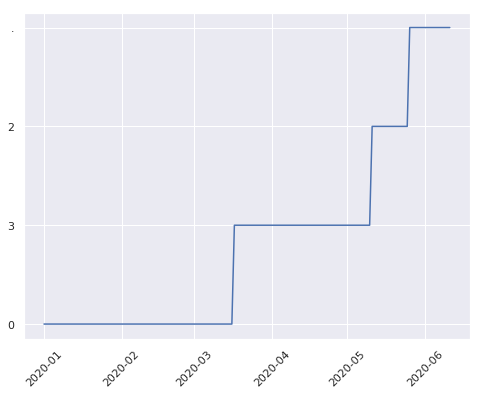

In [99]:
plt.rcParams['figure.figsize'] = [8, 6]

stringency_fr = stringency_all[stringency_all['country']=='France'][['Date', 'c2_workplaceclosing']]

plt.plot(stringency_fr['Date'], stringency_fr['c2_workplaceclosing'])

plt.locator_params(axis='x', nbins=10)

plt.xticks(rotation=45)

plt.show()

In [11]:
## With Regions' names

hosp_classe_age = hosp_classe_age.merge(donnees_regions[['reg', 'ncc']], how = 'outer')

hosp_classe_age.head()

,reg,cl_age90,jour,hosp,rea,rad,dc,ncc
0,1,0,2020-03-18,0,0,0,0,GUADELOUPE
1,1,9,2020-03-18,0,0,0,0,GUADELOUPE
2,1,19,2020-03-18,0,0,0,0,GUADELOUPE
3,1,29,2020-03-18,0,0,0,0,GUADELOUPE
4,1,39,2020-03-18,0,0,0,0,GUADELOUPE


In [29]:
# hosp_classe_age_agg = hosp_classe_age.groupby(['ncc', 'jour'])[['hosp', 'rea', 'rad', 'dc']].sum().reset_index()

# melted = hosp_classe_age_agg.melt(id_vars=['ncc', 'jour'], value_vars=['hosp', 'rea', 'rad', 'dc'])

# g = sns.FacetGrid(melted, col='variable', hue='variable', row='ncc', sharey=False, margin_titles=True, aspect = 1.5, height = 3.)

# g.map(plt.plot, 'jour', 'value')

# for axes in g.axes.flat:
   
#      _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)


In [12]:
## Focus on the Hosp Data 

hosp_only_classe_age_agg = hosp_classe_age[['ncc', 'jour', 'hosp']].groupby(['ncc', 'jour']).sum().reset_index()

hosp_only_classe_age_agg['jour'] = pd.to_datetime(hosp_only_classe_age_agg['jour'], format='%Y-%m-%d') 

hosp_only_classe_age_agg.head()

# melted = hosp_classe_age_agg.melt(id_vars=['reg', 'jour'], value_vars=['hosp'])

# melted = hosp_only_classe_age_agg

# g = sns.FacetGrid(melted, col='ncc', sharey=False, margin_titles=True, col_wrap=3, aspect = 2., height = 4.)

# g.map(plt.plot, 'jour', 'hosp')

# for axes in g.axes.flat:
   
#      _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)

,ncc,jour,hosp
0,AUVERGNE RHONE ALPES,2020-03-18,336
1,AUVERGNE RHONE ALPES,2020-03-19,809
2,AUVERGNE RHONE ALPES,2020-03-20,917
3,AUVERGNE RHONE ALPES,2020-03-21,1151
4,AUVERGNE RHONE ALPES,2020-03-22,1344


In [131]:
def merge_hosp_stringency(df, stringency_df, geo_level, policy, country = None):
    
    stringency_policy = stringency_all[['Date', 'country', policy]]
    
    if geo_level == 'country':
        
        df_stringency = df.merge(stringency_policy, how = 'outer', left_on = ['jour', 'country'], right_on = ['Date', 'country'])
        
    elif geo_level == 'regions':
        
        if country == None :
            
            raise Exception ("The Country Name should be specified ... ")
        
        stringency_policy_country = stringency_policy[stringency_policy['country'] == country]
        
        df_stringency = df.merge(stringency_policy_country, how = 'inner', left_on = 'jour', right_on = 'Date')
        
        df_stringency.drop('jour', axis = 1, inplace = True)
    
    return df_stringency
    
    
data_to_display = merge_hosp_stringency(hosp_only_classe_age_agg, stringency_all, 'regions', 'c5_closepublictransport', country = 'France')


In [132]:
data_to_display.head()

,ncc,hosp,Date,country,c5_closepublictransport
0,AUVERGNE RHONE ALPES,336,2020-03-18,France,1
1,BOURGOGNE FRANCHE COMTE,336,2020-03-18,France,1
2,BRETAGNE,120,2020-03-18,France,1
3,CENTRE VAL DE LOIRE,28,2020-03-18,France,1
4,CORSE,0,2020-03-18,France,1


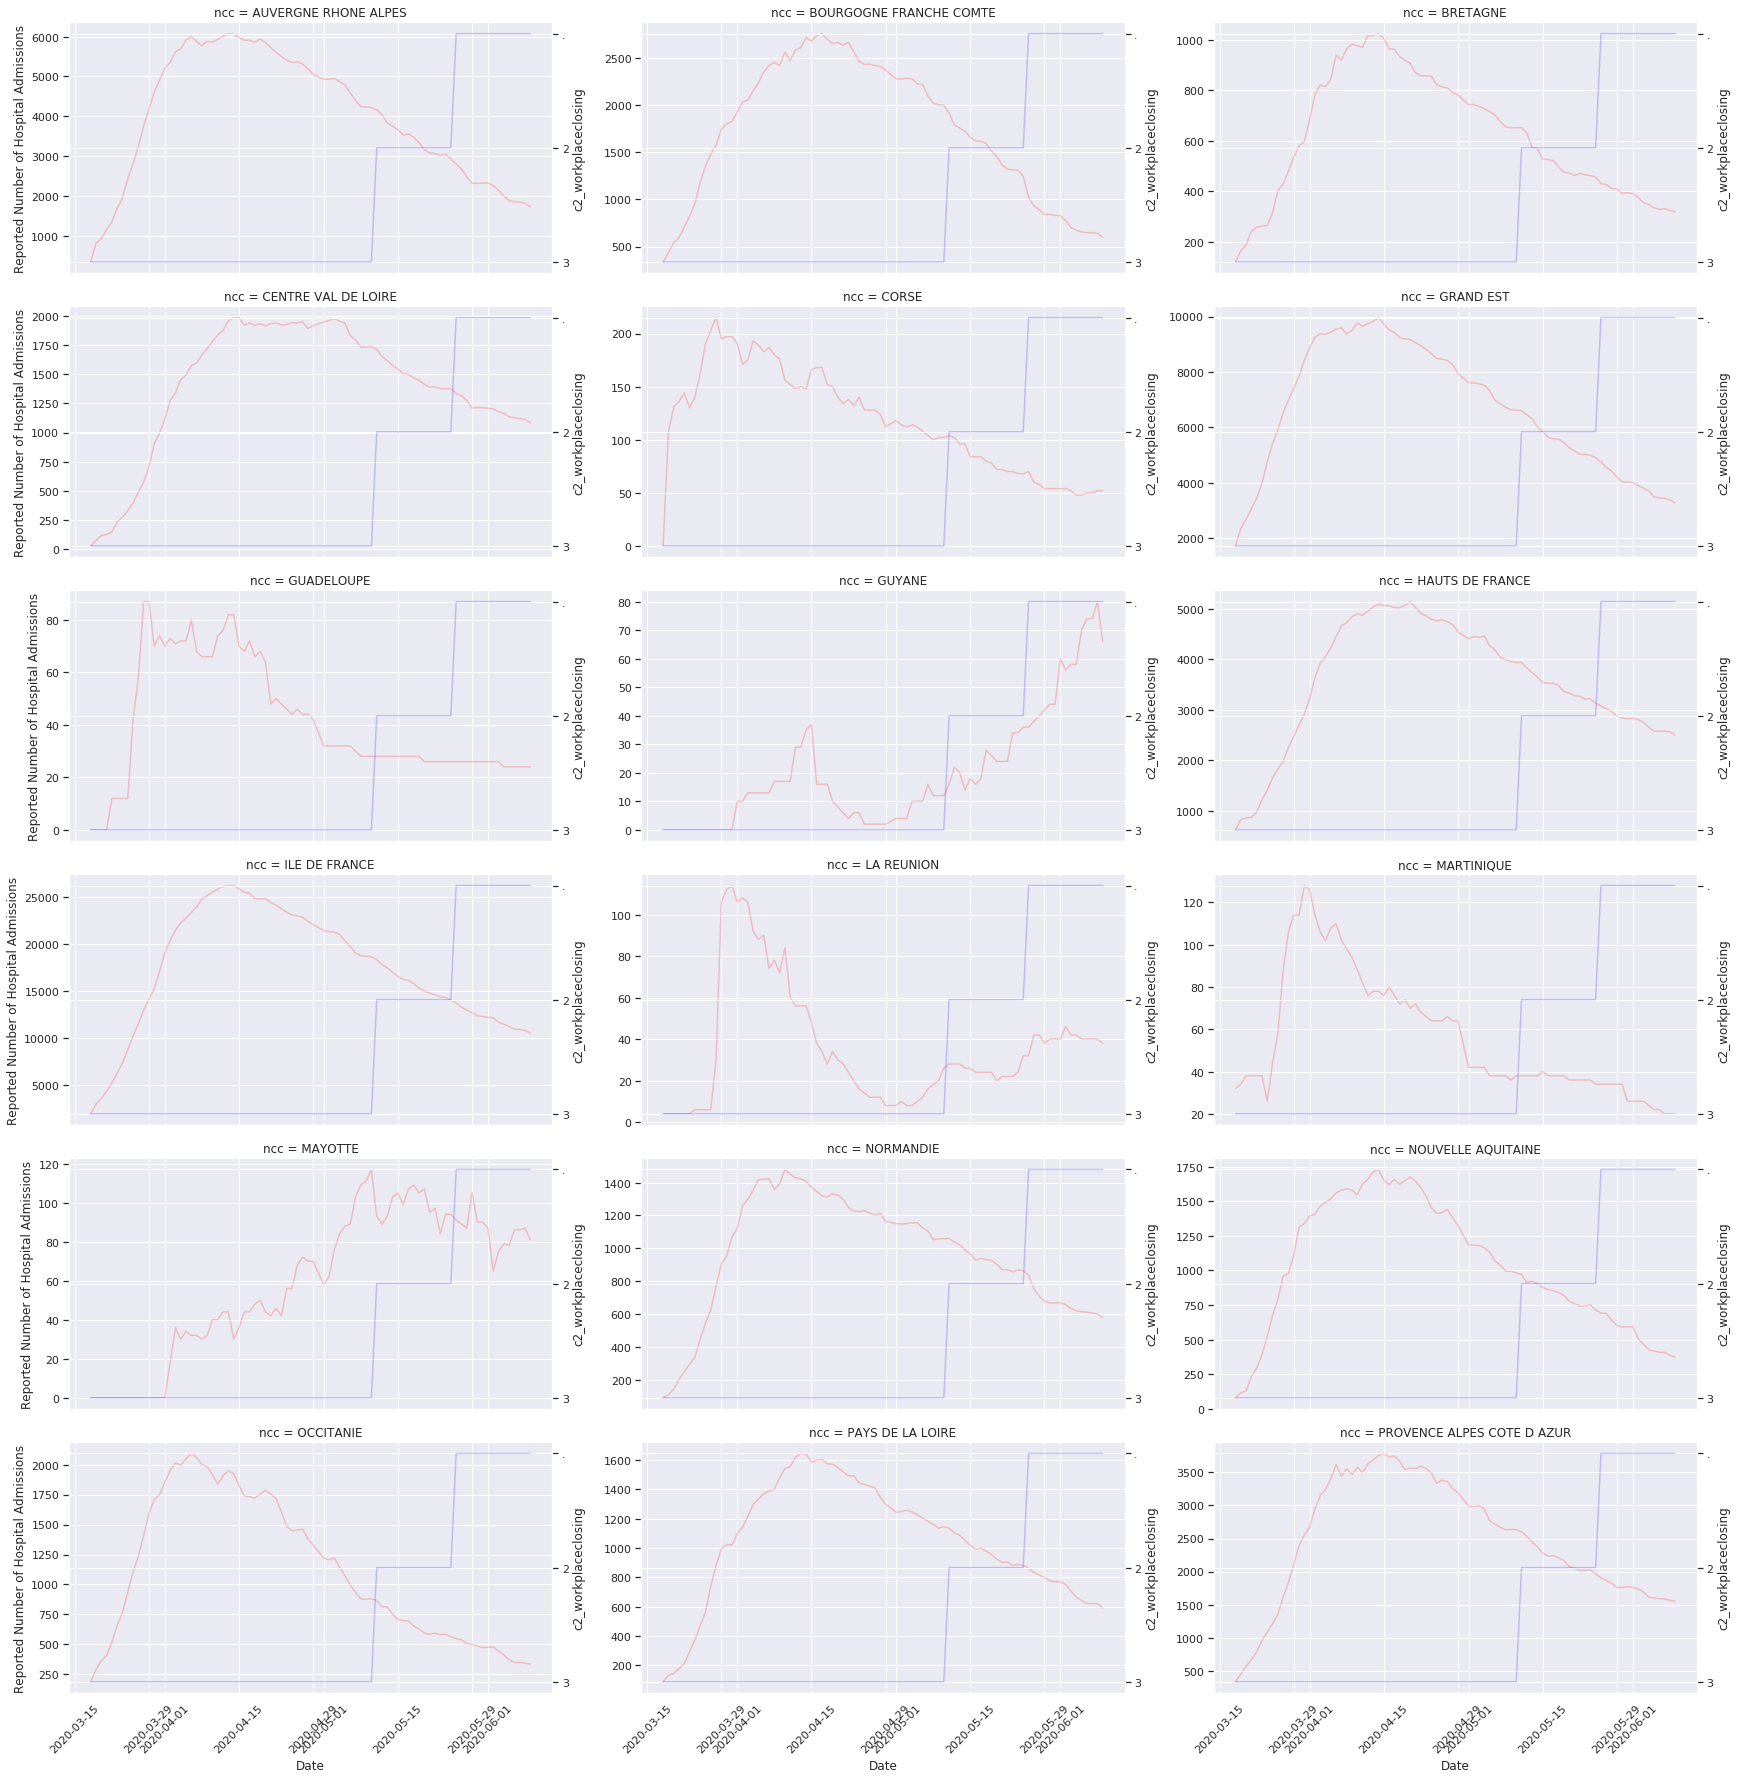

In [130]:
def facetgrid_two_axes(*args, **kwargs):
    
    data = kwargs.pop('data')
    
    dual_axis = kwargs.pop('dual_axis')
    
    policy = kwargs.pop('policy')
    
    alpha = kwargs.pop('alpha', 0.2)
    
    kwargs.pop('color')
    
    ax = plt.gca()
    
    if dual_axis:
        
        ax2 = ax.twinx()
        
        ax2.set_ylabel(policy)

    ax.plot(data['Date'], data['hosp'], **kwargs, color = 'blue')
    
    if dual_axis:
        
        ax2.plot(data['Date'], data[policy], **kwargs, color = 'red', alpha = alpha)
        
g = sns.FacetGrid(data_to_display, col = 'ncc', sharey = False, margin_titles=True, col_wrap=3, aspect = 2., height = 4.)

g.map_dataframe(facetgrid_two_axes, policy = 'c2_workplaceclosing', dual_axis = True).set_axis_labels("Date", "Reported Number of Hospital Admissions")

for axes in g.axes.flat:
   
     _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
    

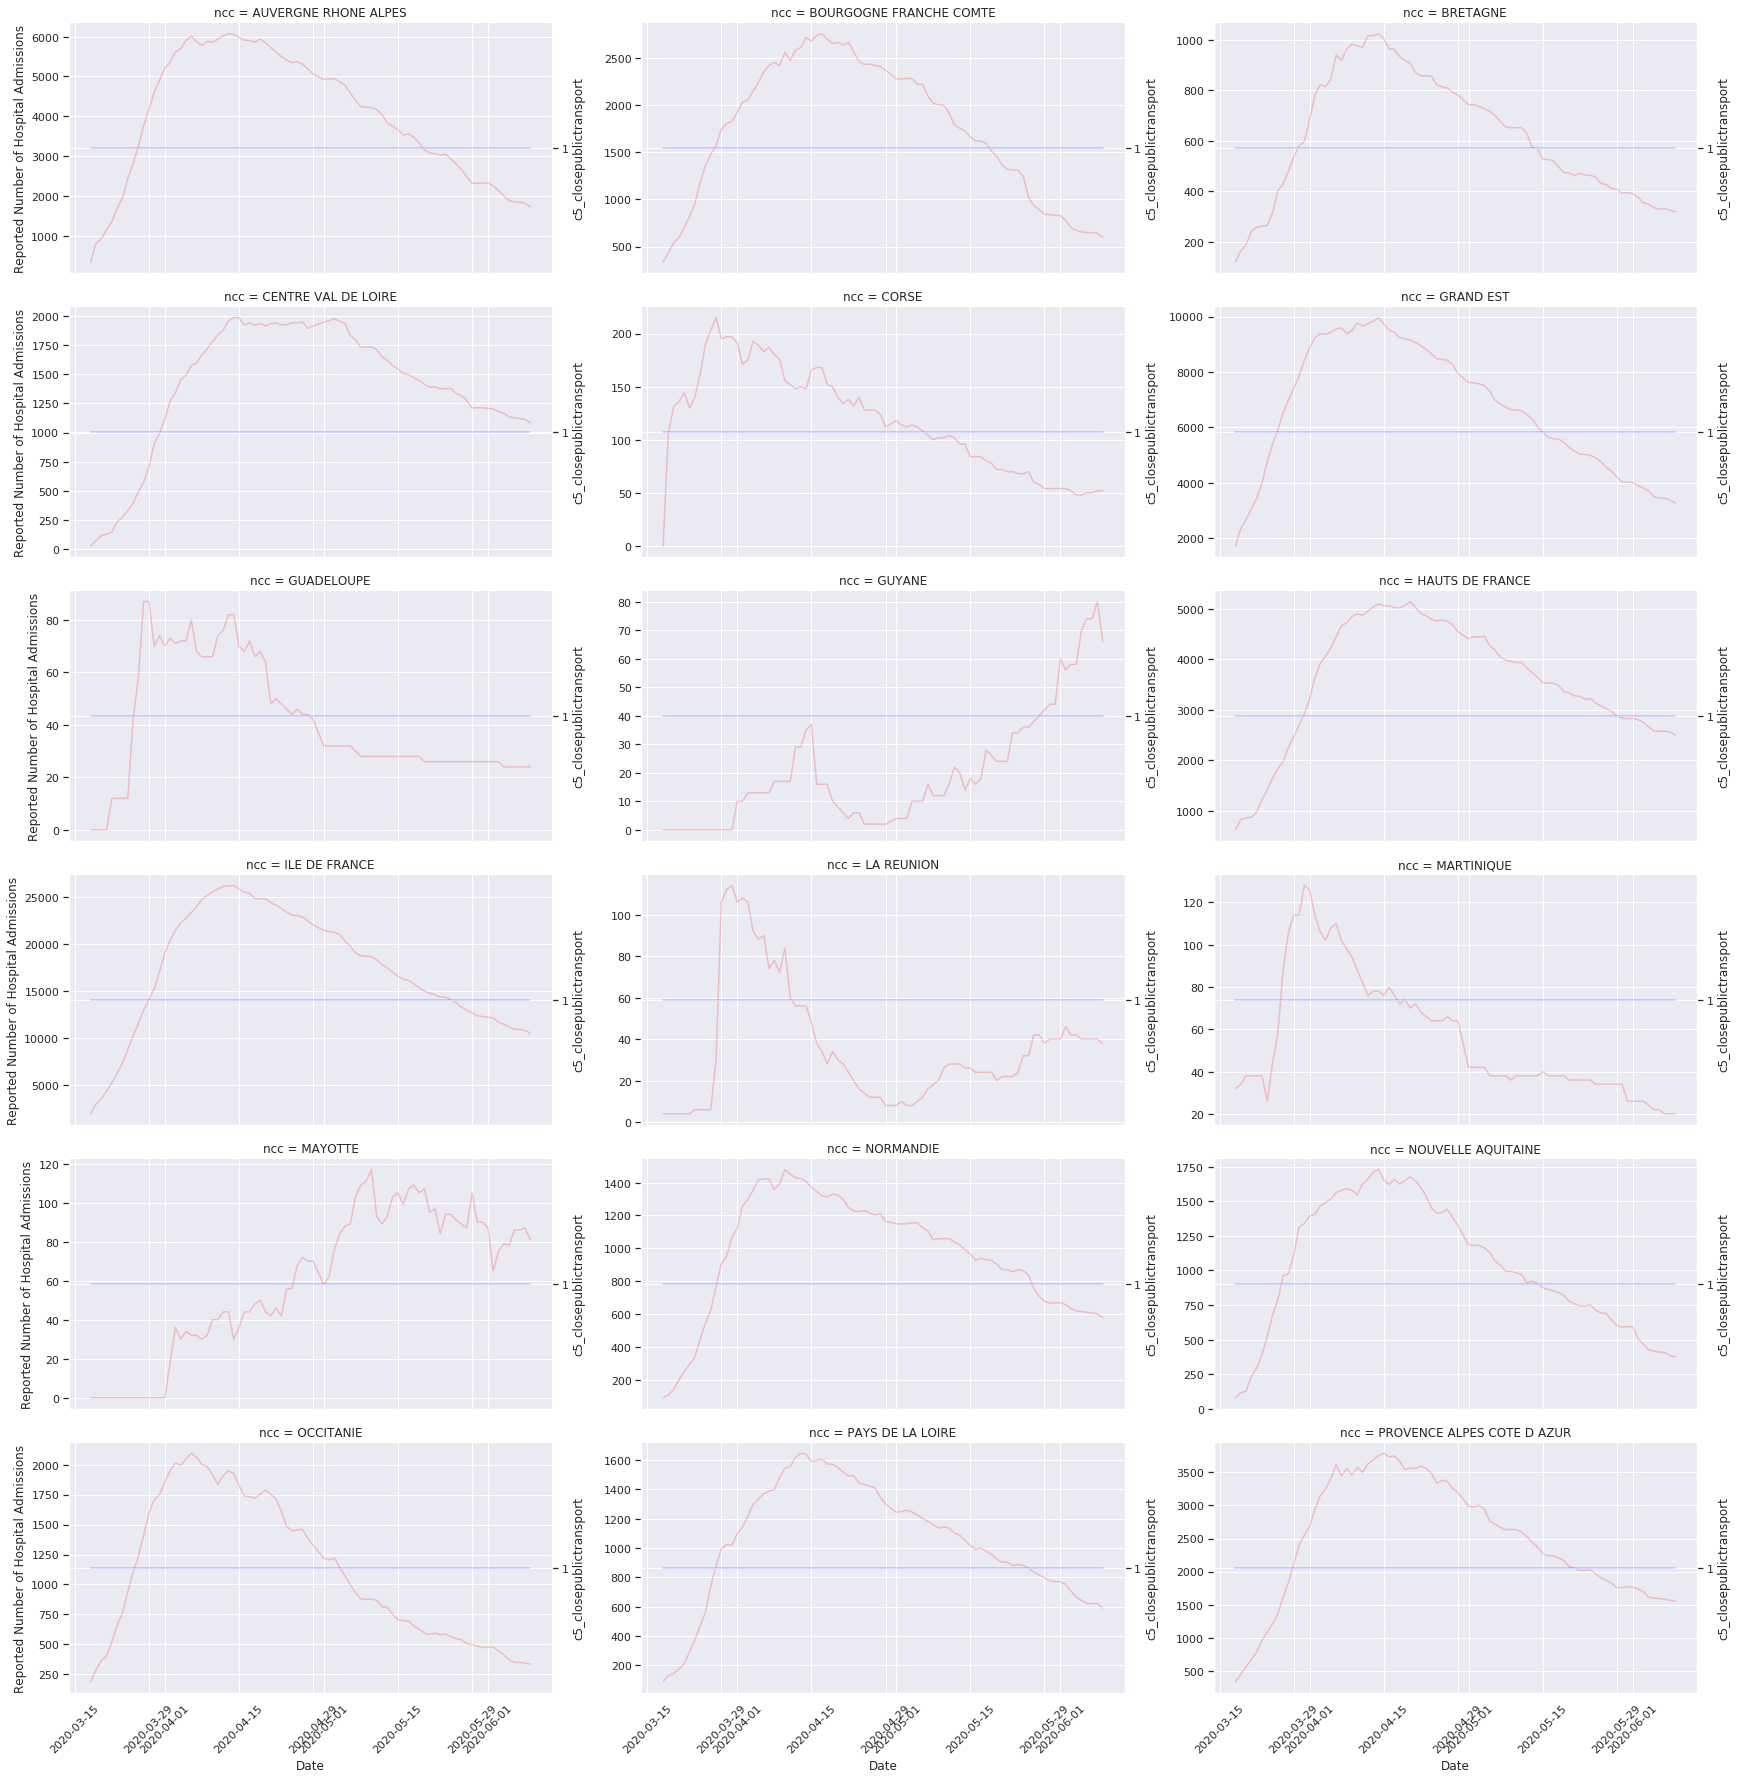

In [133]:
g = sns.FacetGrid(data_to_display, col = 'ncc', sharey = False, margin_titles=True, col_wrap=3, aspect = 2., height = 4.)

g.map_dataframe(facetgrid_two_axes, policy = 'c5_closepublictransport', dual_axis = True).set_axis_labels("Date", "Reported Number of Hospital Admissions")

for axes in g.axes.flat:
   
     _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
    

In [13]:
# ## Focus on the Hosp Data by Regions in France and Stringency Index 

# # hosp_only_classe_age_agg.head()

# # melted = data_to_display.melt(id_vars=['ncc', 'country', 'Date'], value_vars=['hosp', 'c2_workplaceclosing'])

# melted = data_to_display

# g = sns.FacetGrid(melted, col='ncc', sharey = False, margin_titles = True, col_wrap = 3, aspect = 2., height = 4.)

# g.map(plt.plot, 'Date', 'hosp')

# for axes in g.axes.flat:
   
#      _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)

## Reading Reported Cases numbers WW per Country from TDF

In [13]:
#@hidden_cell
IBMCLOUD_APIKEY = 'o0jDto_NoSe4Uo8gzyjTaUQQWbtTUR35_ilfby8Xyekh'
# shared sql query instance
SQL_QUERY_CRN = 'crn:v1:bluemix:public:sql-query:us-south:a/496da4b84c5f4fe8a532aa29731b99c3:372765a4-e05b-42c9-9b0b-ee168f691281::'
# 
QUERY_RESULT_LOCATION = 'cos://us-south/coedl-pz-covidcasedata-sqlquery-gi4erdl/tmp_query_result/'

In [14]:
%%capture

import sys
!{sys.executable} -m pip install pyarrow==0.15.1 ibmcloudsql pandasql
!{sys.executable} -m pip update pandas

In [15]:
from ibmcloudsql import SQLQuery
import pandas as pd
import pandasql as ps
import matplotlib.pyplot as plt

In [16]:
sqlquery_client = SQLQuery(IBMCLOUD_APIKEY, SQL_QUERY_CRN,QUERY_RESULT_LOCATION)

In [62]:
allwhocountry_df = sqlquery_client.run_sql("select * from who_statistics where country_id in ('GB', 'FR', 'DE', 'CN', 'KR', 'US')")

In [63]:
allwhocountry_df[allwhocountry_df['country_id']=='GB']

,country_id,collected,attribution_url,confirmed_cases,deaths,cases_recovered,tests_peoplecount,tests_performed,tests_public,tests_private,cases_hospitalized,cases_presumed,cases_monitored,attribution,source_links,dt
4,GB,2020-04-04T00:00:00.000Z,https://www.who.int,38172,3605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,World Health Organization,https://www.who.int/emergencies/diseases/novel...,2020-04-03
6,GB,2020-04-22T00:00:00.000Z,https://www.who.int,129048,17337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,World Health Organization,https://www.who.int/emergencies/diseases/novel...,2020-04-21
16,GB,2020-04-14T00:00:00.000Z,https://www.who.int,88625,11329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,World Health Organization,https://www.who.int/emergencies/diseases/novel...,2020-04-13
18,GB,2020-06-03T00:00:00.000Z,https://www.who.int,277989,39369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,World Health Organization,https://covid19.who.int/,2020-06-02
28,GB,2020-06-12T00:00:00.000Z,https://www.who.int,291413,41279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,World Health Organization,https://covid19.who.int/,2020-06-11
33,GB,2020-05-28T00:00:00.000Z,https://www.who.int,267244,37460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,World Health Organization,https://covid19.who.int/,2020-05-27
39,GB,2020-03-11T00:00:00.000Z,https://www.who.int,373,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,World Health Organization,https://www.who.int/emergencies/diseases/novel...,2020-03-10
44,GB,2020-03-10T00:00:00.000Z,https://www.who.int,323,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,World Health Organization,https://www.who.int/emergencies/diseases/novel...,2020-03-09
53,GB,2020-03-09T00:00:00.000Z,https://www.who.int,277,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,World Health Organization,https://www.who.int/emergencies/diseases/novel...,2020-03-08
60,GB,2020-03-01T00:00:00.000Z,https://www.who.int,23,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,World Health Organization,https://www.who.int/emergencies/diseases/novel...,2020-02-29


In [21]:
allwhocountry_df.head()

,country_id,collected,attribution_url,confirmed_cases,deaths,cases_recovered,tests_peoplecount,tests_performed,tests_public,tests_private,cases_hospitalized,cases_presumed,cases_monitored,attribution,source_links,dt
0,FR,2020-04-24T00:00:00.000Z,https://www.who.int,119583,21823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,World Health Organization,https://www.who.int/emergencies/diseases/novel...,2020-04-23
1,KR,2020-04-24T00:00:00.000Z,https://www.who.int,10708,240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,World Health Organization,https://www.who.int/emergencies/diseases/novel...,2020-04-23
2,DE,2020-04-24T00:00:00.000Z,https://www.who.int,150383,5321,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,World Health Organization,https://www.who.int/emergencies/diseases/novel...,2020-04-23
3,US,2020-04-24T00:00:00.000Z,https://www.who.int,830053,42311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,World Health Organization,https://www.who.int/emergencies/diseases/novel...,2020-04-23
4,CN,2020-04-24T00:00:00.000Z,https://www.who.int,84311,4642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,World Health Organization,https://www.who.int/emergencies/diseases/novel...,2020-04-23


In [22]:
# Load country dimension data

countries_df = sqlquery_client.run_sql("select * from countries")

countries_df.head()

,country_id,country_name,code_type,centroid_lon,centroid_lat,continent_id
0,MA,Morocco,iso-alpha-2,-7.092620,31.791702,AF
1,PS,State of Palestine,iso-alpha-2,35.233154,31.952162,AS
2,VI,Virgin Islands,iso-alpha-2,-64.896335,18.335765,NaN
3,PE,Peru,iso-alpha-2,-75.015152,-9.189967,SA
4,MO,Macau,iso-alpha-2,113.543873,22.198745,AS


In [23]:
# Demographic data for world

world_demographic_df = sqlquery_client.run_sql("select * from world_demographic")

In [24]:
world_demographic_df.head()

,geo_id,population_aged_0_to_14_years_old_percentage,population_aged_60_plus_years_old_percentage,population_density,population_mid_year_estimates_millions,population_mid_year_estimates_for_females_millions,population_mid_year_estimates_for_males_millions,sex_ratio_males_per_100_females,surface_area_thousand_km2,attribution,attribution_url,geolevel
0,AF,42.4723,4.1655,58.2694,38.0418,18.5120,19.5297,105.4975,652.864,UN data,https://data.un.org/,country
1,AL,17.3996,20.4779,105.1430,2.8809,1.4141,1.4668,103.7236,28.748,UN data,https://data.un.org/,country
2,DZ,30.5504,9.6817,18.0763,43.0531,21.3034,21.7497,102.0949,2381.741,UN data,https://data.un.org/,country
3,AS,33.3418,8.9579,276.5600,0.0553,NaN,NaN,103.6101,0.199,UN data,https://data.un.org/,country
4,AD,14.4338,19.0387,164.1319,0.0771,NaN,NaN,102.2981,0.468,UN data,https://data.un.org/,country


In [64]:
# Build a DataFrame joining WHO statistics (fact) with dimensions countries and world_demographic and also compute columns
who_df = ps.sqldf("""
select ac.country_id, c.country_name, ac.confirmed_cases, ac.deaths, ac.dt, c.centroid_lon lon, c.centroid_lat lat,
                  wd.population_density, wd.population_mid_year_estimates_millions, wd.population_aged_0_to_14_years_old_percentage, wd.population_aged_60_plus_years_old_percentage, 
                  lag(ac.deaths,1) over (partition by ac.country_id order by ac.dt) as deaths_prev,
                  ac.deaths - lag(ac.deaths,1) over (partition by ac.country_id order by ac.dt) as deaths_delta,
                 (ac.deaths*100.00 / (lag(ac.deaths,1) over (partition by ac.country_id  order by ac.dt)))-100 as pct_deaths_incr,
                 avg(ac.deaths) over (partition by ac.country_id order by ac.dt rows between 2 preceding and 2 following) as deaths_smoothed5,
                 lag(ac.confirmed_cases,1) over (partition by ac.country_id order by ac.dt) as cases_prev,
                 ac.confirmed_cases-lag(ac.confirmed_cases,1) over (partition by ac.country_id order by ac.dt) as cases_delta,
                 (ac.confirmed_cases*100.00 / (lag(ac.confirmed_cases,1) over (partition by ac.country_id  order by ac.dt)))-100 as pct_cases_incr,
                 avg(ac.confirmed_cases) over (partition by ac.country_id order by ac.dt rows between 2 preceding and 2 following) as cases_smoothed5
from allwhocountry_df ac 
inner join countries_df c
on ac.country_id=c.country_id
inner join world_demographic_df wd
on ac.country_id=wd.geo_id
""")

In [65]:
who_df.head()

,country_id,country_name,confirmed_cases,deaths,dt,lon,lat,population_density,population_mid_year_estimates_millions,population_aged_0_to_14_years_old_percentage,population_aged_60_plus_years_old_percentage,deaths_prev,deaths_delta,pct_deaths_incr,deaths_smoothed5,cases_prev,cases_delta,pct_cases_incr,cases_smoothed5
0,CN,China,278,0,2020-01-20,104.195397,35.86166,152.7217,1433.7837,17.8045,16.8409,NaN,NaN,NaN,7.666667,NaN,NaN,NaN,386.0
1,CN,China,309,6,2020-01-21,104.195397,35.86166,152.7217,1433.7837,17.8045,16.8409,0.0,6.0,NaN,12.000000,278.0,31.0,11.151079,497.0
2,CN,China,571,17,2020-01-22,104.195397,35.86166,152.7217,1433.7837,17.8045,16.8409,6.0,11.0,183.333333,17.800000,309.0,262.0,84.789644,657.0
3,CN,China,830,25,2020-01-23,104.195397,35.86166,152.7217,1433.7837,17.8045,16.8409,17.0,8.0,47.058824,29.000000,571.0,259.0,45.359019,998.4
4,CN,China,1297,41,2020-01-24,104.195397,35.86166,152.7217,1433.7837,17.8045,16.8409,25.0,16.0,64.000000,43.800000,830.0,467.0,56.265060,1488.8


In [52]:
who_df[who_df['country_name'].str.contains('United')]['country_name'].unique()

array(['United States of America'], dtype=object)

In [68]:
who_df['country_name'].value_counts()

China                       138
Republic of Korea           138
France                      134
United States of America    131
Germany                     131
United Kingdom              127
Name: country_name, dtype: int64

In [69]:
who_confirmed_cases = who_df[['country_name', 'dt', 'confirmed_cases']]

who_confirmed_cases.rename(columns = {'dt': 'jour', 'country_name': 'country'}, inplace = True)

who_confirmed_cases['jour'] = pd.to_datetime(who_confirmed_cases['jour'], format='%Y-%m-%d') 

who_confirmed_cases.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,country,jour,confirmed_cases
0,China,2020-01-20,278
1,China,2020-01-21,309
2,China,2020-01-22,571
3,China,2020-01-23,830
4,China,2020-01-24,1297


In [30]:
def merge_hosp_stringency(df, stringency_df, geo_level, policy, country = None):
    
    stringency_policy = stringency_all[['Date', 'country', policy]]
    
    if geo_level == 'country':
        
        df_stringency = df.merge(stringency_policy, how = 'inner', left_on = ['jour', 'country'], right_on = ['Date', 'country'])
        
    elif geo_level == 'regions':
        
        if country == None :
            
            raise Exception ("The Country Name should be specified ... ")
        
        stringency_policy_country = stringency_policy[stringency_policy['country'] == country]
        
        df_stringency = df.merge(stringency_policy_country, how = 'outer', left_on = 'jour', right_on = 'Date')
        
        df_stringency.drop('jour', axis = 1, inplace = True)
    
    return df_stringency
    
    
data_country_to_display = merge_hosp_stringency(who_confirmed_cases, stringency_all, geo_level = 'country', policy = 'stringency_index_global')

data_country_to_display.head()

,country,jour,confirmed_cases,Date,stringency_index_global
0,China,2020-01-20,278,2020-01-20,8.330000
1,China,2020-01-21,309,2020-01-21,8.330000
2,China,2020-01-22,571,2020-01-22,26.389999
3,China,2020-01-23,830,2020-01-23,44.910000
4,China,2020-01-24,1297,2020-01-24,44.910000


In [ ]:
China                       138
Republic of Korea           138
France                      134
United States of America    131
Germany                     131
United Kingdom              127

In [75]:
stringency_all[stringency_all['country']=='United Kingdom']

,country,Date,c1_schoolclosing,c2_workplaceclosing,c3_cancelpublicevents,c4_restrictionsongatherings,c5_closepublictransport,c6_stayathomerequirements,c7_domestictravel,c8_internationaltravel,e1_incomesupport,e2_debtcontractrelief,h1_publicinfocampaign,h2_testingpolicy,h3_contactracing,stringency_index_global
58,United Kingdom,2020-01-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000
236,United Kingdom,2020-01-02,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000
414,United Kingdom,2020-01-03,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000
592,United Kingdom,2020-01-04,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000
770,United Kingdom,2020-01-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000
948,United Kingdom,2020-01-06,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000
1126,United Kingdom,2020-01-07,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000
1304,United Kingdom,2020-01-08,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000
1482,United Kingdom,2020-01-09,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000
1660,United Kingdom,2020-01-10,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000


In [39]:
data_country_to_display['country'].value_counts()

China      133
France     130
Germany    129
Name: country, dtype: int64

In [31]:
data_country_to_display.dtypes

country                            object
jour                       datetime64[ns]
confirmed_cases                     int64
Date                       datetime64[ns]
stringency_index_global           float64
dtype: object

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


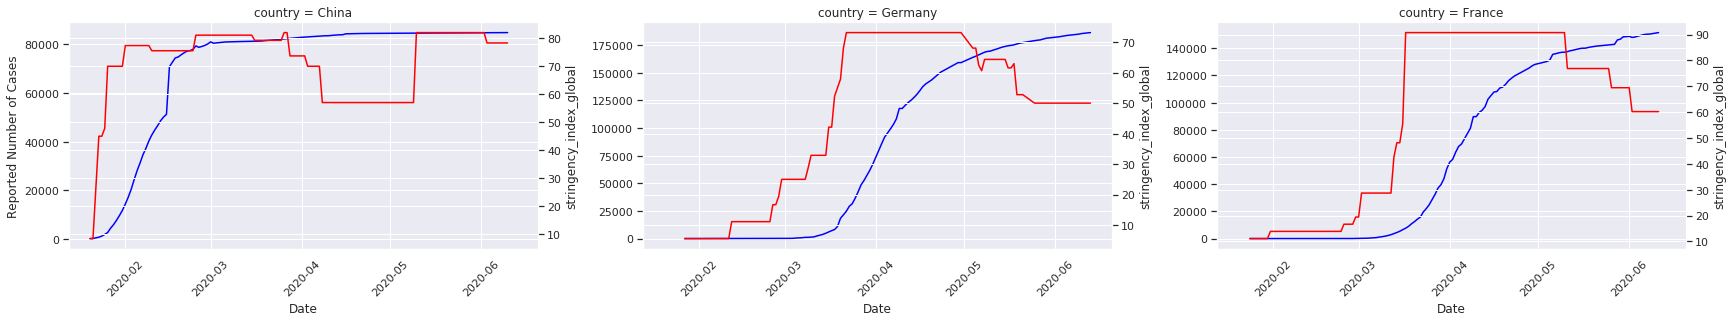

In [32]:
def facetgrid_two_axes(*args, **kwargs):
    
    data = kwargs.pop('data')
    
    dual_axis = kwargs.pop('dual_axis')
    
    policy = kwargs.pop('policy')
    
    alpha = kwargs.pop('alpha', 0.2)
    
    kwargs.pop('color')
    
    ax = plt.gca()
    
    if dual_axis:
        
        ax2 = ax.twinx()
        
        ax2.set_ylabel(policy)
        
        ax2.xaxis.label.set_color('red')

    ax.plot(data['Date'], data['confirmed_cases'], **kwargs, color = 'blue')
    
    if dual_axis:
        
        ax2.plot(data['Date'], data[policy], **kwargs, color = 'red')

g = sns.FacetGrid(data_country_to_display, col = 'country', sharey = False, margin_titles=True, col_wrap=3, aspect = 2., height = 4.)

g.map_dataframe(facetgrid_two_axes, policy = 'stringency_index_global', dual_axis = True).set_axis_labels("Date", "Reported Number of Cases")

for axes in g.axes.flat:
   
     _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
    

In [31]:
## Analyzing disparity in Infections and Deaths

In [30]:
hosp_classe_age.head()

,reg,cl_age90,jour,hosp,rea,rad,dc,ncc
0,1,0,2020-03-18,0,0,0,0,GUADELOUPE
1,1,9,2020-03-18,0,0,0,0,GUADELOUPE
2,1,19,2020-03-18,0,0,0,0,GUADELOUPE
3,1,29,2020-03-18,0,0,0,0,GUADELOUPE
4,1,39,2020-03-18,0,0,0,0,GUADELOUPE


In [37]:
figures_per_clage = hosp_classe_age[['cl_age90','hosp', 'rea','dc']].groupby('cl_age90')['hosp', 'rea','dc'].sum().reset_index()

figures_per_clage_melted = figures_per_clage.melt(id_vars = ['cl_age90'], value_vars = ['hosp', 'rea', 'dc'])

figures_per_clage_melted.head()

,cl_age90,variable,value
0,0,hosp,1754586
1,9,hosp,5158
2,19,hosp,4845
3,29,hosp,18275
4,39,hosp,43311


In [41]:
figures_per_clage.head()

,cl_age90,hosp,rea,dc
0,0,1754586,292829,1019213
1,9,5158,1119,141
2,19,4845,1161,185
3,29,18275,3131,1150
4,39,43311,8608,4575


In [10]:
donnees_hosp.head()

,dep,sexe,jour,hosp,rea,rad,dc
0,01,0,2020-03-18,2,0,1,0
1,01,1,2020-03-18,1,0,1,0
2,01,2,2020-03-18,1,0,0,0
3,02,0,2020-03-18,41,10,18,11
4,02,1,2020-03-18,19,4,11,6


In [11]:
donnees_hosp_eta.head()

,dep,jour,nb
0,01,2020-03-18,1
1,02,2020-03-18,4
2,03,2020-03-18,2
3,04,2020-03-18,2
4,05,2020-03-18,2


In [12]:
donnees_hosp_nouveaux.head()

,dep,jour,incid_hosp,incid_rea,incid_dc,incid_rad
0,01,2020-03-19,1,0,0,0
1,01,2020-03-20,0,0,0,1
2,01,2020-03-21,4,0,0,0
3,01,2020-03-22,3,1,0,1
4,01,2020-03-23,14,1,0,5
